## Group Assignment #2: Census Data Exploration

###### For this assignment I will be exploring the census data of Los Angles, and evlauating its racial profile. This data is important because our goal is to understand how socioeconomic profiles in LA may impact their vunerbility to the extremities of heat. My goal is to seek the percentage of minorities in the census blocks, and compare minority population to the entirety of the city. 

###### Author of the assignment: Pa-Shun Hawkins 

### Importing Library and Data

###### In this first step, I will be importing pandas because it is a library, and this will allow me to work with the data. The out come of this is the pandas opening. 

In [2]:
#impoting the library pandas
import pandas as pd

In [5]:
# Here I am loading the data file into python and renaming it df
# I am also typing out "df" which will print a small sample of the data
#for me to see
df=pd.read_csv('Data/la_demographincs.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Data/la_demographincs.csv'

#### Checking the Size of the Data
###### By looking at the shape of the data we will see the number of rows and columns that this data frame has. For this instance there are 2498 rows and 50 columns, and the head function will show the top of the data set

In [9]:
# This will show the rows and columns
df.shape

(2498, 50)

In [10]:
# looking at a subset of the data. This will portray the first 5 rows of data.
df.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_PLACE,Geo_CSA,...,SE_T017_020,SE_T017_002,SE_T017_004,SE_T017_006,SE_T017_008,SE_T017_010,SE_T017_012,SE_T017_014,SE_T017_016,SE_T017_018
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,6,37,NaN,101110,NaN,NaN,...,4.121750,4.050484,6.927711,-12.162162,-50.000000,-10.699588,100.0,-53.333333,23.776224,4.305136
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,6,37,NaN,101122,NaN,NaN,...,1.746725,3.140175,7.263028,19.230769,75.000000,-20.808081,-100.0,130.000000,2.586207,-5.739130
2,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,6,37,NaN,101220,NaN,NaN,...,-0.564972,8.225729,5.354994,-5.555556,-63.636364,29.411765,-100.0,600.000000,-3.809524,-15.015723
3,6037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,6,37,NaN,101221,NaN,NaN,...,0.291206,0.132567,5.444126,-17.977528,-25.000000,-5.747126,0.0,100.000000,-41.666667,0.597780
4,6037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,6,37,NaN,101222,NaN,NaN,...,9.859155,17.241379,27.074236,-19.148936,50.000000,-20.855615,NaN,NaN,-2.500000,-0.763359


#### Inspect Data Types
###### Looking at the different variables of the data, and the type of data they are. 

In [11]:
# Using verbose to see the columns and show_counts to see the non null variables

df.info (verbose=True, show_counts= True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo_FIPS     2498 non-null   int64  
 1   Geo_NAME     2498 non-null   object 
 2   Geo_QNAME    2498 non-null   object 
 3   Geo_NATION   2498 non-null   int64  
 4   Geo_STATE    2498 non-null   int64  
 5   Geo_COUNTY   2498 non-null   int64  
 6   Geo_CS       0 non-null      float64
 7   Geo_CT       2498 non-null   int64  
 8   Geo_PLACE    0 non-null      float64
 9   Geo_CSA      0 non-null      float64
 10  SE_T004_019  2498 non-null   int64  
 11  SE_T004_001  2498 non-null   int64  
 12  SE_T004_003  2498 non-null   int64  
 13  SE_T004_005  2498 non-null   int64  
 14  SE_T004_007  2498 non-null   int64  
 15  SE_T004_009  2498 non-null   int64  
 16  SE_T004_011  2498 non-null   int64  
 17  SE_T004_013  2498 non-null   int64  
 18  SE_T004_015  2498 non-null   int64  
 19  SE_T00

#### Bringing Back the Leading Zeros for the Unique Identifier
###### First we will use the code below to look at the FIPS codes, and verifiy that the leading zeros are missing. The outcome is the first five rows of the Geo_FIPS column, and the zeros are missing.

In [12]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

###### Next, I am going to change the dtype of the unique indentifiess from interger to strings. The outcome from the next code will be the dtype of these intergers changing. Also, because it is a string now, the leading zero will be back.

In [13]:
# I am reading in the file, calling the columns and chaning their dtype
df = pd.read_csv(
    'Data/la_demographincs.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

###### The next code will check to see if the intergers were changed to string. This will also reveal if the leading zeros are back.

In [14]:
# showing top of data frame
df.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_PLACE,Geo_CSA,...,SE_T017_020,SE_T017_002,SE_T017_004,SE_T017_006,SE_T017_008,SE_T017_010,SE_T017_012,SE_T017_014,SE_T017_016,SE_T017_018
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,06,037,NaN,101110,NaN,NaN,...,4.121750,4.050484,6.927711,-12.162162,-50.000000,-10.699588,100.0,-53.333333,23.776224,4.305136
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,06,037,NaN,101122,NaN,NaN,...,1.746725,3.140175,7.263028,19.230769,75.000000,-20.808081,-100.0,130.000000,2.586207,-5.739130
2,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,06,037,NaN,101220,NaN,NaN,...,-0.564972,8.225729,5.354994,-5.555556,-63.636364,29.411765,-100.0,600.000000,-3.809524,-15.015723
3,06037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,06,037,NaN,101221,NaN,NaN,...,0.291206,0.132567,5.444126,-17.977528,-25.000000,-5.747126,0.0,100.000000,-41.666667,0.597780
4,06037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,06,037,NaN,101222,NaN,NaN,...,9.859155,17.241379,27.074236,-19.148936,50.000000,-20.855615,NaN,NaN,-2.500000,-0.763359


###### Checking again to make sure that the dtypes have been changed. The outome will be the list of all the variables/columns and their dtype. The hope is to see that the dtype of the identifiers has been changed to interger.

In [15]:
# look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo_FIPS     2498 non-null   object 
 1   Geo_NAME     2498 non-null   object 
 2   Geo_QNAME    2498 non-null   object 
 3   Geo_NATION   2498 non-null   int64  
 4   Geo_STATE    2498 non-null   object 
 5   Geo_COUNTY   2498 non-null   object 
 6   Geo_CS       0 non-null      float64
 7   Geo_CT       2498 non-null   int64  
 8   Geo_PLACE    0 non-null      float64
 9   Geo_CSA      0 non-null      float64
 10  SE_T004_019  2498 non-null   int64  
 11  SE_T004_001  2498 non-null   int64  
 12  SE_T004_003  2498 non-null   int64  
 13  SE_T004_005  2498 non-null   int64  
 14  SE_T004_007  2498 non-null   int64  
 15  SE_T004_009  2498 non-null   int64  
 16  SE_T004_011  2498 non-null   int64  
 17  SE_T004_013  2498 non-null   int64  
 18  SE_T004_015  2498 non-null   int64  
 19  SE_T00

#### Removing All Null Columns 

In [16]:
# .dropna is going to remove the null parts in the dataset. Axis one is used to get rid of the columns and how=all makes sure to get rid of all the empthy columns.  
df = df.dropna(axis=1,how="all")

###### Using this next function to make sure there are no empthy columns of data in this data frame anymore. The result is just brackets beause I have removed all the null data columns with the previous function

In [17]:
df.columns[df.isna().all()].tolist()

[]

#### Choosing which Columns to keep and Renaming them
###### Here I am going to only keep the data from 2020 because it is the most recent census data

In [18]:
# I am keeping the total population data, and all the demographic data from 2020.
#Next I am going to create a new data set where the refined columns and their data will be
columns_to_keep = ['Geo_FIPS',
                   'SE_T004_019',
                   'SE_T004_001',
                   'SE_T004_003',
                   'SE_T004_005',
                   'SE_T004_007',
                   'SE_T004_009',
                   'SE_T004_011',
                   'SE_T004_013',
                   'SE_T004_015',
                   'SE_T004_017']
# add it to a new dataframe
df2 = df[columns_to_keep]

##### Below, we are renaming the columns based on the metadata

In [19]:
# Renaming columns
df2.columns = ['FIPS',
'TotalPop',
'Non Hispanic',
'Non Hispanic White Alone',
'Non Hispanic Black Alone',
'Non Hispanic American Indian and Alaska Native Alone',
'Non Hispanic Asian Alone',
'Non Hispanic Native Hawaiian and Pacific Islander Alone',
'Non Hispanic Other Alone',
'Non Hispanic Multi Race',
'Hispanic']

###### Checking to see if they have been renamed. 

In [20]:
# Printing the new data frame to ensure that the renaming occured
df2

,FIPS,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
0,06037101110,4926,3545,2840,65,7,434,8,14,177,1381
1,06037101122,3728,3186,2614,31,7,392,0,23,119,542
2,06037101220,3344,2263,1751,34,4,352,0,21,101,1081
3,06037101221,3444,2266,1840,73,3,246,3,10,91,1178
4,06037101222,2808,1768,1455,76,3,148,0,8,78,1040
...,...,...,...,...,...,...,...,...,...,...,...
2493,06037980038,4,2,0,0,0,0,0,0,2,2
2494,06037980039,0,0,0,0,0,0,0,0,0,0
2495,06037990100,0,0,0,0,0,0,0,0,0,0
2496,06037990200,0,0,0,0,0,0,0,0,0,0


##### Creating a Bargraph that will show the Average Population of Each Group in LA

###### This graph will help examine the racial distribution within the county. This analysis will later facilitate comparisons to determine if smaller populations are more exposed to heat than larger ones or vise versa. 

###### First I will find all the averages for each group

In [67]:
# the output will be the average for this group
df2['Non Hispanic'].mean()

2085.366693354684

In [36]:
# the output will be the average for this group

df2['Non Hispanic White Alone'].mean()

1026.2646116893516

In [35]:
# the output will be the average for this group

df2['Non Hispanic Black Alone'].mean()

304.5192153722978

In [37]:
# the output will be the average for this group

df2['Non Hispanic American Indian and Alaska Native Alone'].mean()

7.3871096877502005

In [38]:
# the output will be the average for this group

df2['Non Hispanic Asian Alone'].mean()

590.1669335468375

In [39]:
# the output will be the average for this group

df2['Non Hispanic Other Alone'].mean()

23.4919935948759

In [40]:
# the output will be the average for this group

df2['Non Hispanic Multi Race'].mean()

125.32145716573258

In [41]:
# the output will be the average for this group

df2['Hispanic'].mean()

1923.4439551641312

In [23]:
# This will create the new data frame df3. The df3 dataframe will create a new data frame that consist of the races and their paried averages calculated above.
df3 = pd.DataFrame({'Race':['Non Hispanic', 'Non Hispanic White Alone', 'Non Hispanic Black Alone','Non Hispanic American Indian and Alaska Native Alone','Non Hispanic Asian Alone','Non Hispanic Other Alone','Non Hispanic Multi Race','Hispanic'],'Average population':[2085.366693354684, 1026.2646116893516, 304.5192153722978,7.3871096877502005,590.1669335468375,23.4919935948759,125.32145716573258,1923.4439551641312

]})


In [24]:
#Sorting the data from df3 from increasing to decreasing values.
df3_sorted = df3.sort_values(by='Average population',ascending = False)
df3_sorted

,Race,Average population
0,Non Hispanic,2085.366693
7,Hispanic,1923.443955
1,Non Hispanic White Alone,1026.264612
4,Non Hispanic Asian Alone,590.166934
2,Non Hispanic Black Alone,304.519215
6,Non Hispanic Multi Race,125.321457
5,Non Hispanic Other Alone,23.491994
3,Non Hispanic American Indian and Alaska Native...,7.387110


<Axes: xlabel='Race'>

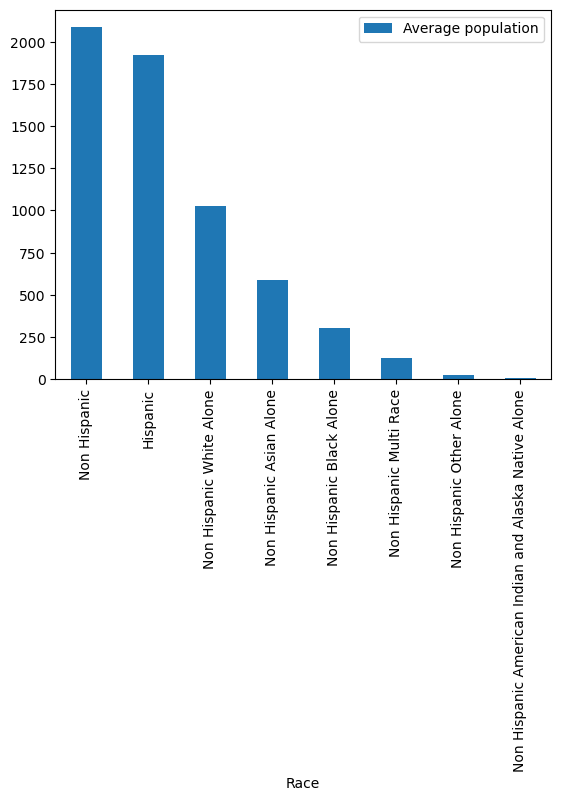

In [62]:
# We are now prining the newly sorted df3. The outcome should be a bargraph with the average populations in decending order.
df3_sorted.plot.bar(x='Race',
                            y='Average population')

<Axes: title={'center': 'The Racial Population Distribution in Los Angeles County in 2020'}, xlabel='Race'>

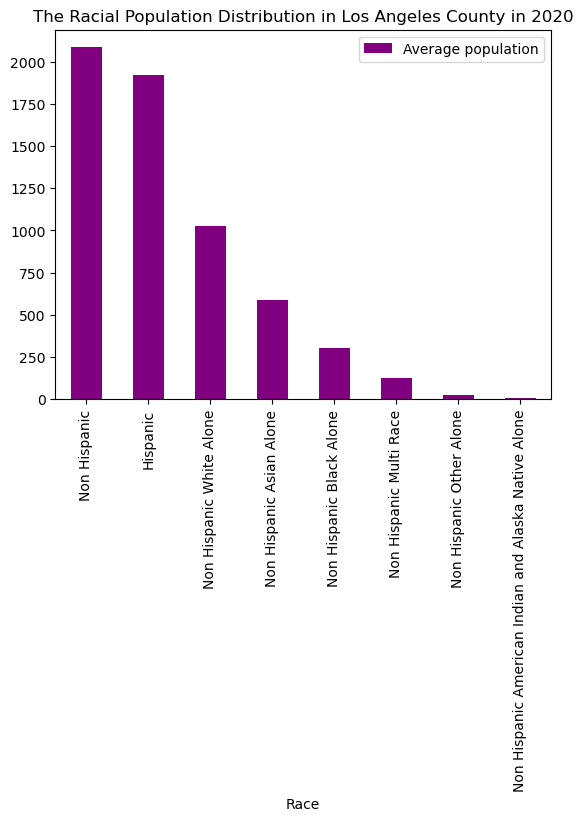

In [69]:
# Adding more detail to the graph such as a title and changing the color to purple to make it more appealing

df3_sorted.plot.bar(x='Race',
                            y='Average population', 
                            title='The Racial Population Distribution in Los Angeles County in 2020',
                            color='Purple')

##### Creating a Bargraph to see how these demographics compare to each other in terms of percentages. 


###### (What I learned making the pie chart:Initially, when I initially created the pie chart, I used only pandas. However, this approach led to a pie chart with a legend obstructing the actual data. Upon further research, I discovered that incorporating Python Matplotlib was necessary for more effective manipulation of the chart. Eventually, I managed to reposition the chart, but I am currently facing challenges in refining the labels on the chart.)
 

<Axes: ylabel='Average population'>

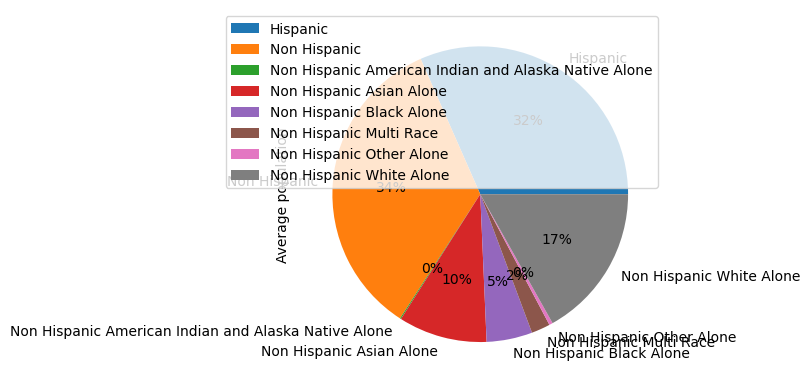

In [97]:
#Grouping the data by race, and the outcome should show what percentage of the entire population each group takes up. It should do this by showing a piechart.  
df3.groupby(['Race']).sum().plot( 
    kind='pie', y='Average population', autopct='%1.0f%%',) 

###### In the visual above the legend is blocking the figure, so we will move the legend using the bbox_to_anchor parameter.
###### Oringinally, I did not import Python Matplotlib, so the computer sent an error stating that "plt. was not defined"


In [ ]:
#  Importing matplotlib.pyplot this will allow plt to be defined 
import matplotlib.pyplot as plt

##### Creating a Pie Chart
Using plt should remove the legend off the top of the pie chart.

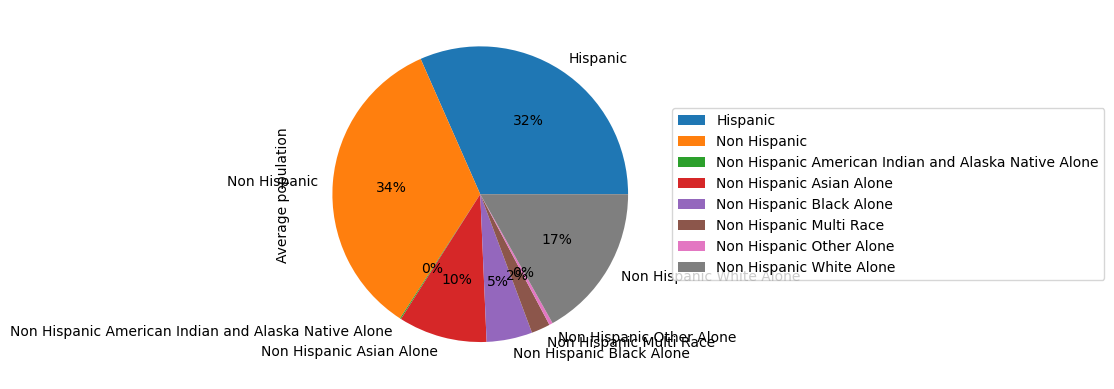

In [99]:
# creates the pie chart 
df3.groupby(['Race']).sum().plot( 
    kind='pie', y='Average population', autopct='%1.0f%%',) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5) ) #moves the legned off the plot

# shows the chart
plt.show() 

###### Now we are going to try and fix remove the 'race' lables off if the actual chart.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


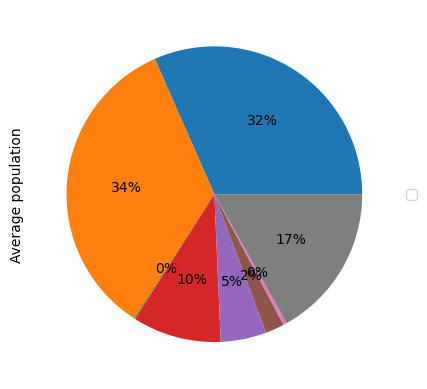

In [89]:
# Assigning this pie chart as ax. 

ax = df3.groupby(['Race']).sum().plot(
    kind='pie', y='Average population', autopct='%1.0f%%',
    labels=None  # Set labels to None to remove them from the pie
)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5) )


###### We removed the lables, but now there is no legend. 

#### Creating a Bargraph of the Racial Profiles for the highest Census Tract 

###### First, I am going to sort the census tracts from highest to lowest total populations. The outcome should be a table with the tracts being sorted from highest to lowest population.

In [159]:
# Sorting the census tracts by highest population
df_sorted2 = df2.sort_values(by='TotalPop',ascending = False)
df_sorted2

,FIPS,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
938,06037265301,13527,10668,3611,927,82,5872,35,65,76,2859
2278,06037702900,11373,10252,8099,503,10,841,17,145,637,1121
1028,06037275604,10520,9444,5631,709,11,2309,22,83,679,1076
2438,06037920121,10332,8426,4045,469,11,3166,23,90,622,1906
2417,06037920043,8832,6510,3289,550,8,2113,7,65,478,2322
...,...,...,...,...,...,...,...,...,...,...,...
2492,06037980037,0,0,0,0,0,0,0,0,0,0
2461,06037980003,0,0,0,0,0,0,0,0,0,0
2486,06037980030,0,0,0,0,0,0,0,0,0,0
2480,06037980022,0,0,0,0,0,0,0,0,0,0


###### Creating a dataframe for the census tract with the highest total population. The outcome should be a data frame with only the information from line 938. 

In [160]:
# Isolating the census tract with the highest population
single_row = pd.DataFrame(df2.loc[938])
single_row

,938
FIPS,06037265301
TotalPop,13527
Non Hispanic,10668
Non Hispanic White Alone,3611
Non Hispanic Black Alone,927
Non Hispanic American Indian and Alaska Native Alone,82
Non Hispanic Asian Alone,5872
Non Hispanic Native Hawaiian and Pacific Islander Alone,35
Non Hispanic Other Alone,65
Non Hispanic Multi Race,76


###### Reconfiguring the data frame so that the Rance and Average Population are differntiated under their own columns

In [162]:
# creating the columns and rows for this data in a new data frame
df5 = pd.DataFrame({'Race':['Non Hispanic','Non Hispanic White Alone','Non Hispanic Black Alone','Non Hispanic American Indian and Alaska Native Alone','Non Hispanic Asian Alone','Non Hispanic Native Hawaiian and Pacific Islander Alone','Non Hispanic Other Alone','Non Hispanic Multi Race','Hispanic'],'Average population':[10668, 3611, 927,82,5872,35,65,76,2859

]})

In [154]:
df5

,Race,Average population
0,Non Hispanic,10668
1,Non Hispanic White Alone,3611
2,Non Hispanic Black Alone,927
3,Non Hispanic American Indian and Alaska Native...,82
4,Non Hispanic Asian Alone,5872
5,Non Hispanic Native Hawaiian and Pacific Islan...,35
6,Non Hispanic Other Alone,65
7,Non Hispanic Multi Race,76
8,Hispanic,2859


###### Creating the bargraph using the census tract with the highest population

<Axes: title={'center': 'The Racial Distribution for the Census Tract with the Highest Population'}, xlabel='Race'>

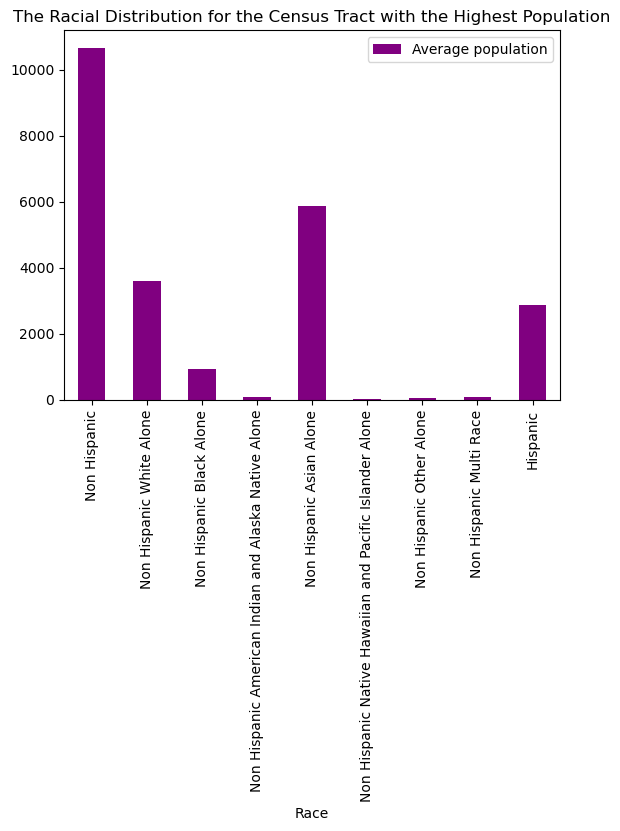

In [164]:
#Creating Bargraph
df5.plot.bar(x='Race',
                            y='Average population', 
                            title='The Racial Distribution for the Census Tract with the Highest Population',
                            color='Purple')

###### Next, the goal is to make the graph look more visually appealing. I am going to rank the average population from highest to lowest.

In [165]:
# Organizing the data this will rank the average population in order from highest to lowest
df5_sorted = df5.sort_values(by='Average population',ascending = False)
df3_sorted

,Race,Average population
0,Non Hispanic,2085.366693
7,Hispanic,1923.443955
1,Non Hispanic White Alone,1026.264612
4,Non Hispanic Asian Alone,590.166934
2,Non Hispanic Black Alone,304.519215
6,Non Hispanic Multi Race,125.321457
5,Non Hispanic Other Alone,23.491994
3,Non Hispanic American Indian and Alaska Native...,7.387110


###### Creating the new bow plot. It should now be in decending order. 

<Axes: title={'center': 'The Racial Population Distribution in Los Angeles County in 2020'}, xlabel='Race'>

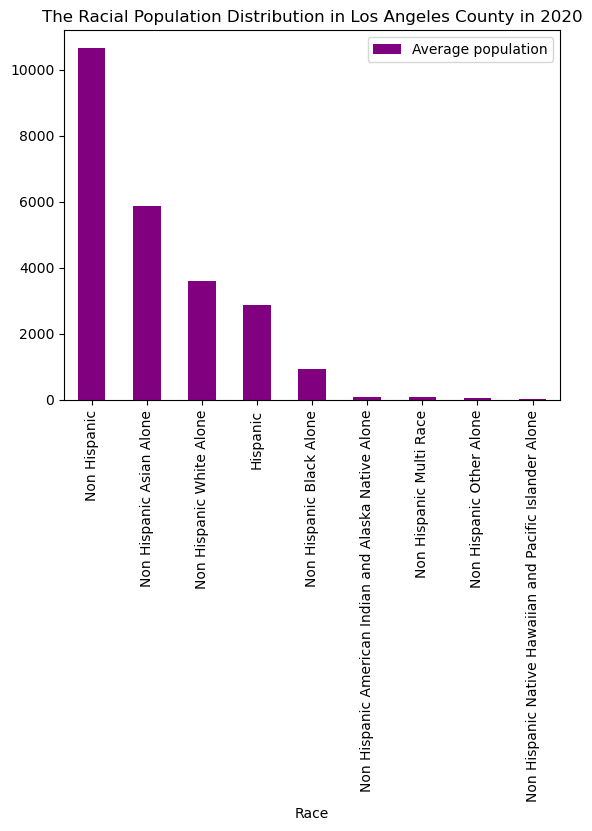

In [158]:
# this creates a bargraph
df5_sorted.plot.bar(x='Race',
                            y='Average population', 
                            title='The Racial Population Distribution in Los Angeles County in 2020',
                            color='Purple')

#### Mapping

##### First, we are going to import the geopandas library so that we can create the maps

In [32]:
# Importing geopandas
import geopandas as gpd

In [33]:
# Reading in the file with the Los Angeles Tracts Data, This will display a map of LA county
tracts=gpd.read_file('Data/Census_Tracts.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


##### The step below will actually show us the map of Los Angeles

<Axes: >

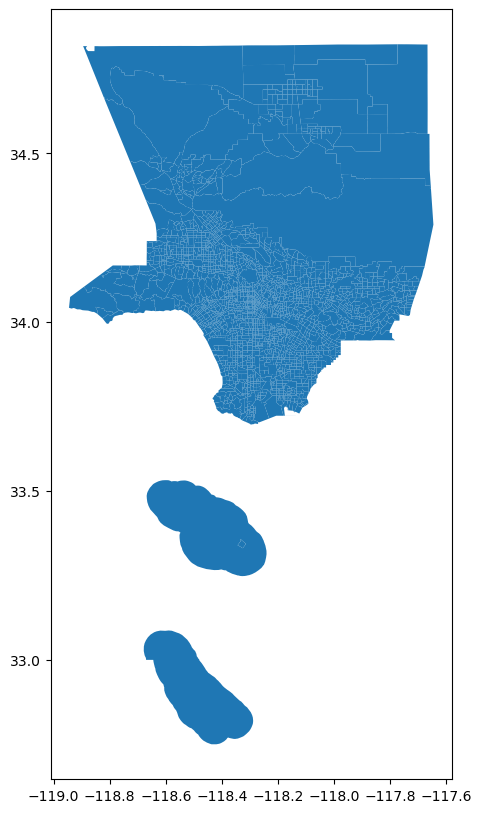

In [34]:
# plotting the data previously imported
tracts.plot(figsize=(12,10))

In [35]:
# Checking the data, looking at its dtypes, and variables in its columns and rows
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [36]:
# subsetting the data to only keep the FIPS and geometery
#After printing it out, we will see the new data set with the 
#requested columns
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [40]:
# creating a FIPS column this will put the tracts to the left of FIPS in the dataframe displayed below
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [42]:
#Merging the dataframe containg race with the dataframe previouly imported.
tractsmerge=tracts.merge(df2,on="FIPS")

In [43]:
#Checking to see if the two data frames have been merged
tractsmerge.head()

,CT20,geometry,FIPS,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,4926,3545,2840,65,7,434,8,14,177,1381
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,3728,3186,2614,31,7,392,0,23,119,542
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3344,2263,1751,34,4,352,0,21,101,1081
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3444,2266,1840,73,3,246,3,10,91,1178
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2808,1768,1455,76,3,148,0,8,78,1040


#### Creating a Map with Folium
###### In the next steps, I will be creating a map using folium. This map will display where the mojority of groups are located other than white persons.  

In [44]:
#Importing the folium library
import folium

In [50]:
# creating new columns for percentages
tractsmerge['PCT_Black'] = tractsmerge['Non Hispanic Black Alone']/tracts_race['TotalPop']*100
tractsmerge['PCT_Asian'] = tractsmerge['Non Hispanic Asian Alone']/tracts_race['TotalPop']*100
tractsmerge['PCT_American Indian and Alaska Native'] = tractsmerge['Non Hispanic American Indian and Alaska Native Alone']/tracts_race['TotalPop']*100
tractsmerge['PCT_Hawaiian and Pacific Islander'] = tractsmerge['Non Hispanic Native Hawaiian and Pacific Islander Alone']/tracts_race['TotalPop']*100
tractsmerge['PCT_Hispanic'] = tractsmerge['Hispanic']/tracts_race['TotalPop']*100
tractsmerge['PCT_Multi Race'] = tractsmerge['Non Hispanic Multi Race']/tracts_race['TotalPop']*100

In [1]:
# Creating the folium map, the outcome should be a map that shows us how these various groups are distributed
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over base map. This will provide the color to the map to help better differentiate between high to low populations
folium.Choropleth(
                  geo_data=tractsmerge, # geodata
                  data=tractsmerge, # data          
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS','PCT_Black','PCT_Asian', 'PCT_American Indian and Alaska Native','PCT_Hawaiian and Pacific Islander','PCT_Hispanic','PCT_Multi Race'], # these are the different racial groups
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Population All Groups Excluding White (2020)').add_to(m)    # name on the legend color bar
m
m.save('race.html')

NameError: name 'folium' is not defined